In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("wine_data.csv", header = None, usecols = [0, 1, 2])
df.columns = ['Class_label', 'Alcohol', 'Malic_acid']

In [10]:
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


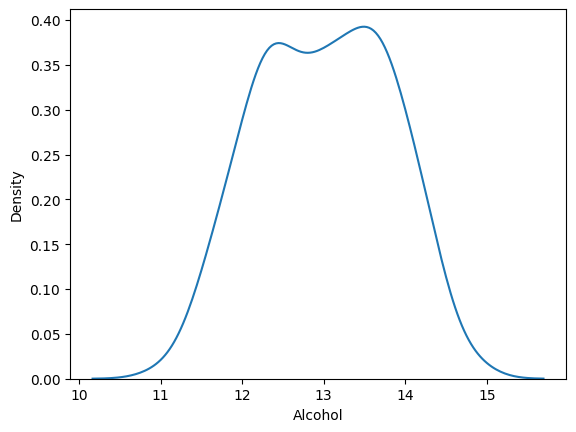

In [11]:
sns.kdeplot(df['Alcohol'])
plt.show()

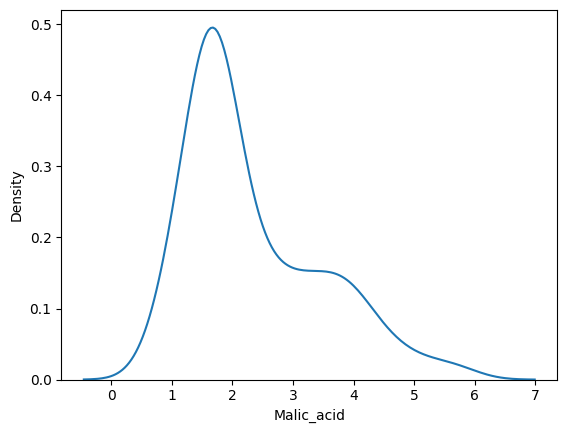

In [12]:
sns.kdeplot(df['Malic_acid'])
plt.show()

In [14]:
color_dict = {1:'red', 2:'green', 3:'blue'}
sns.scatterplot(df['Alcohol'], df['Malic_acid'], hue=df['Class_label'], palette=color_dict)
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given